<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-evelyntr/blob/main/Phase_2_DATA_301_Lab_1B_Evelyn_Tran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

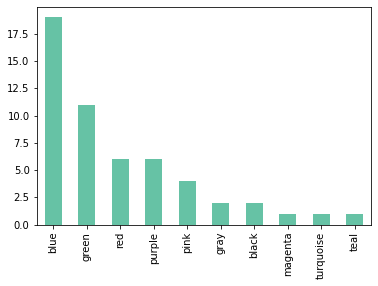

In [ ]:
import pandas as pd 

sheet_url = 'https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_survey = pd.read_csv(url_1)

df_survey["color"] = df_survey["What is your favorite color?"]
df_survey["color"] = df_survey["color"].str.lower()


df_survey["color"] = df_survey["color"].map({
    "light blue": "blue",
    "blue": "blue",
    "green": "green",
    "red": "red",
    "purple": "purple",
    "pink": "pink",
    "dark green": "green",
    "navy": "blue",
    "magenta": "magenta",
    "royal blue": "blue",
    "gray": "gray",
    "grey": "gray",
    "light pink": "pink",
    "turquoise": "turquoise",
    "teal": "teal",
    "black": "black",
    "forest green": "green"
})

color_counts = df_survey["color"].value_counts()
color_counts.plot.bar()


I followed these instructions to read in the data from Google spreadsheets: https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550. Most of the students in DATA 301 have blue (and some variation of blue) as their favorite color. Approximately 18/57 students favor blue. In second, the most popular favorite color is green. Magenta, teal, and turquoise all have 1 vote; however, these colors could have also fit into either the purple/ pink categories and blue/ green, respectively. 

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

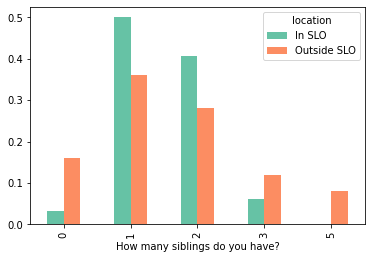

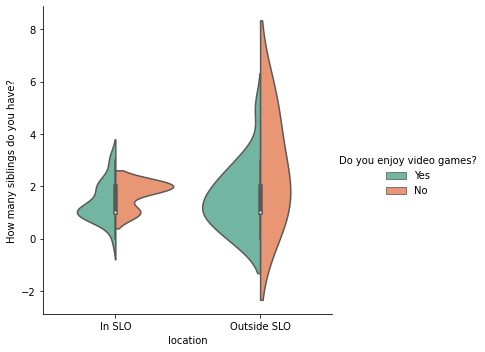

In [ ]:
import pandas as pd 
import seaborn as sns

sheet_url = 'https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_survey = pd.read_csv(url_1)

df_survey["location"] = df_survey["Where are you living this quarter?"].map({
    "Off Campus, but in SLO": "In SLO",
    "Off Campus, outside of SLO": "Outside SLO",
    "On-Campus housing": "In SLO"
})

joint_sibiling_location = pd.crosstab(df_survey["How many siblings do you have?"], df_survey["location"], 
                                    normalize=True)
# joint_sibiling_location
location = joint_sibiling_location.sum(axis=0)
cond_sib_loc = joint_sibiling_location.divide(location, axis=1)
cond_sib_loc.plot.bar()

# Challenge
sns.set_palette("Set2")
sns.catplot(data=df_survey, kind="violin", x="location", y="How many siblings do you have?", hue="Do you enjoy video games?", split=True)

I would say there is no relationship between the number of sibilings a student has and whether or not they live in SLO. Looking at the bar chart, we can see that most people have 1 or 2 sibilings. In SLO and outside of SLO, having 1 or 2 sibilings dominate the bar, and while the frequencies are higher in SLO, I don't see this difference as a meaningful observation to suggest a relationship between the number of sibilings a student has and whether or not they live in SLO. 

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

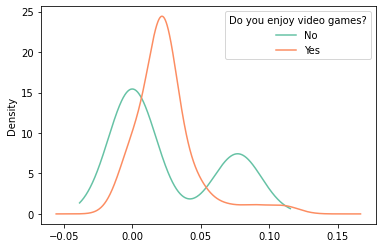

In [ ]:
import pandas as pd 

sheet_url = 'https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_survey = pd.read_csv(url_1)

df_survey["golf"] = df_survey["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"]
joint_golf_games = pd.crosstab(df_survey["golf"], df_survey["Do you enjoy video games?"], 
                                    normalize=True)
games = joint_golf_games.sum(axis=0)
cond_golf_games = joint_golf_games.divide(games, axis=1)
cond_golf_games.plot.density()

I discovered an interesting relationship between golf ball number guesses and who enjoys video games. While most of the responses to the golf ball question are different, we can see an almost even dispersal of the number of people that do not enjoy video games and their guesses, compared to those who do enjoy video games. Not only do more people enjoy video games, but several of those who enjoy video games, shared the same hypothesis of the number of golf balls that can fit in a bus, which is difficult in such an open ended question. I came to this relationship by comparing golf guess with the questions of sports, video games, and if students considered themselves artistic. I chose to look at these questions because they were distinctly yes or no questions, so I'd assumed they would be easier to analyze. Then I compared their bar charts to see if I could find an interesting relationship. I once heard that playing video games helps with cognitive stimulation, problem-solving, and decision-making, so I found a correlation between video games and the guesses. 



## Question 4

Is there a relationship between major and if the student is a sports fan?

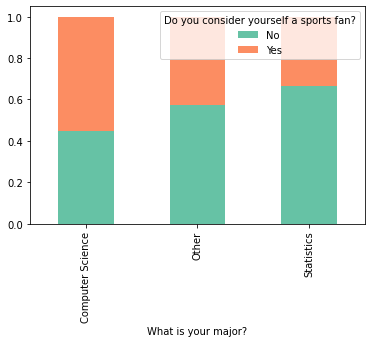

In [ ]:
import pandas as pd 

sheet_url = 'https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_survey = pd.read_csv(url_1)

joint_major_sports = pd.crosstab(df_survey["What is your major?"], df_survey["Do you consider yourself a sports fan?"], 
                                    normalize=True)
joint_major_sports
major = joint_major_sports.sum(axis=1)
cond_major_sports = joint_major_sports.divide(major, axis=0)
cond_major_sports.plot.bar(stacked=True)

There does not seem to be an obvious suggestion that major and being a sports fan are related, but looking at the bar graph we can see that over 50% of Computer Science students are sports fans; whereas, in Statistics and Other, over 50% of the students are not sports fans.